In [1]:
!pip install seaborn

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/MyDrive/Colab Notebooks/Allen_NLP_hackathon

/content/drive/.shortcut-targets-by-id/18wIy9U4zK_LdoQmnfHm1GL3Xzxy8Ki6V/Allen_NLP_hackathon


In [26]:
df_male = pd.read_csv('Data/male_importance_Scores.csv', index_col=None)
df_female = pd.read_csv('Data/female_importance_Scores.csv', index_col=None)
df_male['Category'] = ['Male'] * len(df_male)
df_female['Category'] = ['Female'] * len(df_female)

In [97]:
df_gender = pd.concat([df_male, df_female])

In [104]:
df_gender['pair_num'] = df_gender.index

In [99]:
df_gender

,word,avg_attribution_scores,Category,pair_num
0,brother,0.003675,Male,0
1,male,NaN,Male,1
2,man,0.002834,Male,2
3,boy,0.000338,Male,3
4,son,-0.001302,Male,4
5,he,-0.000276,Male,5
6,his,0.000020,Male,6
7,him,0.001301,Male,7
8,father,-0.001567,Male,8
0,sister,-0.000156,Female,0


In [107]:
gender_pairs = [(m, f) for m, f in zip(df_male.word, df_female.word)]
gender_pairs.remove(('his', 'hers'))
gender_pairs.remove(('son', 'daughter'))

In [103]:
df_gender.drop(index=df_gender.loc[df_gender.pair_num == 6].index, inplace=True)

In [102]:
df_gender.drop(index=df_gender.loc[df_gender.pair_num == 4].index, inplace=True)

In [95]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(14, 11)})

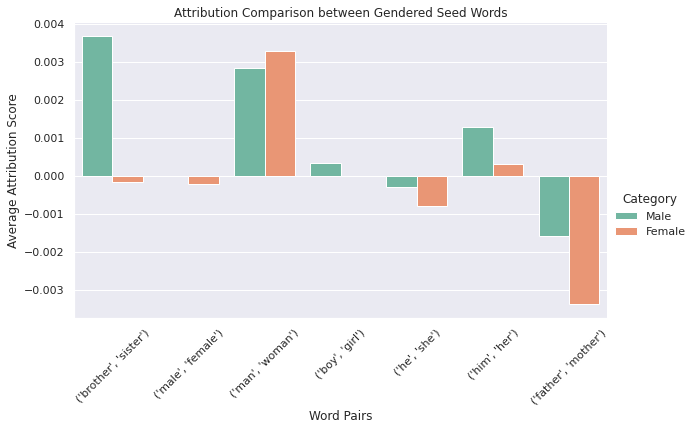

In [108]:
g = sns.catplot(
    data=df_gender, kind='bar', x='pair_num', y='avg_attribution_scores',
    hue='Category', palette='Set2', height=5, aspect=1.75
)
g.set_xticklabels(gender_pairs)
plt.xticks(rotation=45)
g.set(
    title='Attribution Comparison between Gendered Seed Words',
    xlabel='Word Pairs', ylabel='Average Attribution Score')

In [110]:
g.savefig('Results/gender.png', dpi=300)

In [111]:
df_w = pd.read_csv('Data/white_importance_Scores.csv', index_col=None)
df_b = pd.read_csv('Data/black_importance_Scores.csv', index_col=None)
df_a = pd.read_csv('Data/asian_importance_Scores.csv', index_col=None)

df_w['Category'] = ['White'] * len(df_w)
df_b['Category'] = ['Black'] * len(df_b)
df_a['Category'] = ['Asian'] * len(df_a)

In [122]:
df_race = pd.concat([df_w, df_b, df_a], ignore_index=True)

In [123]:
df_race= df_race.drop_duplicates(subset='word')

In [127]:
df_race.drop(index=0, inplace=True)

In [128]:
df_race['id'] = [1, 2, 3] * 3

In [129]:
df_race

,word,avg_attribution_scores,Category,id
2,white,-0.001137,White,1
3,america,-0.000979,White,2
5,europe,0.000555,White,3
6,black,0.001907,Black,1
7,african,-0.000648,Black,2
9,africa,0.000987,Black,3
12,asian,0.001136,Asian,1
15,asia,-0.000175,Asian,2
16,china,-0.000551,Asian,3


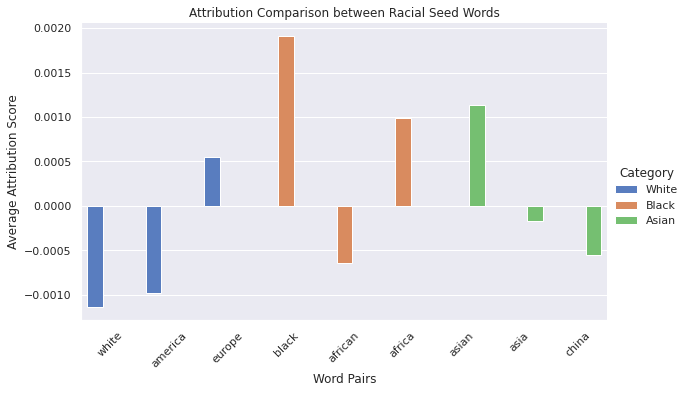

In [134]:
g = sns.catplot(
    data=df_race, kind='bar', x='word', y='avg_attribution_scores',
    hue='Category', palette='muted', height=5, aspect=1.75
)
# g.set_xticklabels(gender_pairs)
plt.xticks(rotation=45)
g.set(
    title='Attribution Comparison between Racial Seed Words',
    xlabel='Word Pairs', ylabel='Average Attribution Score')

In [135]:
g.savefig('Results/race.png', dpi=300)